Here is an attempt and compensating and pregating.

In [1]:
import sys
sys.path.append('../')
import compensateflowcyte as cfc
import gateflowcyte as gfc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
comp,cmeta=cfc.getCompensated('hek_A1.fcs')

FCS3.1
[58, 3596, 3597, 14212477, 0, 0]
5


In [3]:
comp.head()

,T0,T1,INFO,FS00-H,FS00-A,FS00-W,FS01-H,FS01-A,FS01-W,SS02-H,...,FL10-H,FL10-A,FL10-W,FL13-H,FL13-A,FL13-W,FL17-H,FL17-A,FL17-W,TIME
0,1012204876,0,-52992,7861248,8659712,644775936,146055680,150799360,612302848,2384128,...,47616,19906.719254,54591488,9472,15104.0,40140800,22528,15872.0,49774592,2024410
1,1012205584,0,-52992,7292672,7603200,600637440,111274240,110981632,594706432,420864,...,284928,131527.708222,182878208,211968,100608.0,114819072,13568,18688.0,63012864,2024411
2,1012206410,0,-52992,4016640,4094464,545390592,120256000,119805440,574160896,1079296,...,64512,24777.926223,112394240,31488,18176.0,112689152,11264,14336.0,28934144,2024413
3,1012208675,0,-52992,4037632,4253952,598278144,23332608,27854848,659324928,713216,...,212992,61360.618885,109871104,138496,73472.0,108167168,2816,12544.0,27394048,2024417
4,1012211347,0,-52992,2543104,2561024,551321600,26640896,28141312,606273536,1059072,...,74496,44223.841791,170754048,28416,18944.0,111575040,11008,14336.0,36274176,2024423


In [4]:
comp.columns

Index(['T0', 'T1', 'INFO', 'FS00-H', 'FS00-A', 'FS00-W', 'FS01-H', 'FS01-A',
       'FS01-W', 'SS02-H', 'SS02-A', 'SS02-W', 'FL03-H', 'FL03-A', 'FL03-W',
       'FL04-H', 'FL04-A', 'FL04-W', 'FL10-H', 'FL10-A', 'FL10-W', 'FL13-H',
       'FL13-A', 'FL13-W', 'FL17-H', 'FL17-A', 'FL17-W', 'TIME'],
      dtype='object')

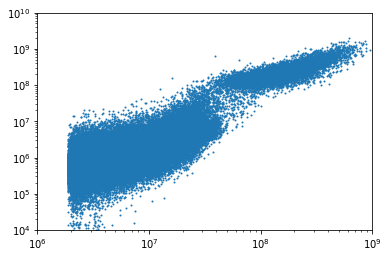

In [5]:
#now need to do the scatter gate (SS02-A vs. FS00-A)
plt.scatter(comp['FS00-H'],comp['SS02-H'],s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e6,1e9)
plt.ylim(1e4,1e10)
plt.show()

In [6]:
#show this plot in napari, will create the viewer as well
fig,figimg,viewer=gfc.addNapariHist(comp,'FS00-H','SS02-H',limits=[1e7,1e9,1e7,1e9],logs=[True,True],multiplier=2.0)

In [20]:
#once the gate is added it will be in the data object from the last layer
scattergate=viewer.layers[-1].data[0]
scattergate

array([[ 761.30837409,  417.46557897],
       [ 759.28576948,  995.93049717],
       [ 194.97908355, 1001.998311  ],
       [ 197.00168815,  415.44297436]])

In [8]:
#copy the gate from the cell above so we can skip the interactive part if we already have the gates defined
scattergate=np.array([[ 761.30837409,  417.46557897],
       [ 759.28576948,  995.93049717],
       [ 194.97908355, 1001.998311  ],
       [ 197.00168815,  415.44297436]])

In [9]:
inscatgate,_,_=gfc.plotGateContains(comp['FS00-H'],comp['SS02-H'],scattergate,limits=[1e7,1e9,1e7,1e9],logs=[True,True])
fgate=(np.array(inscatgate).sum()/len(inscatgate))
print(str(fgate*100)+'% scatter gate')

7.14617900918299% scatter gate


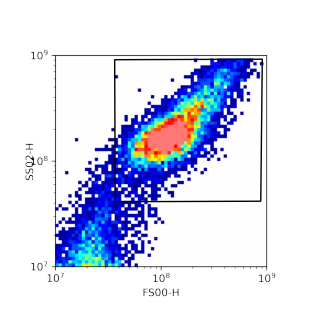

In [10]:
#if we want we can draw the figure with the gate on it here
overfig,overimg=gfc.overlayImageGate(figimg,scattergate)
overfig.set_dpi(100)
overfig

In [11]:
#now draw the image to get the single cell gate
_,figimg,_=gfc.addNapariHist(comp,'FS00-W','FS00-H',limits=[2e8,5e9,1e6,2e9],logs=[True,True],viewer=viewer)

In [27]:
viewer.layers[-1].data[0]

array([[621.74865606, 461.96288037],
       [617.70344685, 900.86808055],
       [283.97368635, 898.84547594],
       [285.99629095, 453.87246194]])

In [12]:
scgate=np.array([[621.74865606, 461.96288037],
       [617.70344685, 900.86808055],
       [283.97368635, 898.84547594],
       [285.99629095, 453.87246194]])

In [13]:
inscgate,_,_=gfc.plotGateContains(comp['FS00-W'],comp['FS00-H'],scgate,limits=[2e8,5e9,1e6,2e9],logs=[True,True])
fgate=(np.array(inscgate).sum()/len(inscgate))
print(str(fgate*100)+'% single cell gate')

7.5458164190281005% single cell gate


In [14]:
#now draw the image to get the second single cell gate
_,figimg,_=gfc.addNapariHist(comp,'SS02-W','SS02-H',limits=[1e8,5e9,1e7,5e9],logs=[True,True],viewer=viewer)

In [34]:
viewer.layers[-1].data[0]

array([[385.1039168 , 680.40417816],
       [906.93590595, 815.91868696],
       [898.84548751, 435.66902045],
       [585.3417731 , 425.55599741],
       [399.26214906, 506.46018177]])

In [15]:
scgate2=np.array([[385.1039168 , 680.40417816],
       [906.93590595, 815.91868696],
       [898.84548751, 435.66902045],
       [585.3417731 , 425.55599741],
       [399.26214906, 506.46018177]])

In [16]:
insc2gate,_,_=gfc.plotGateContains(comp['SS02-W'],comp['SS02-H'],scgate2,limits=[1e8,5e9,1e7,5e9],logs=[True,True])
fgate=(np.array(insc2gate).sum()/len(insc2gate))
print(str(fgate*100)+'% single cell2 gate')

6.128561857092184% single cell2 gate


In [21]:
#now draw the image to get the expressing gate
_,figimg,_=gfc.addNapariHist(comp,'FL03-A','FL10-A',limits=[2e4,5e9,5e3,5e9],logs=[True,True],viewer=viewer,multiplier=4.0)

In [46]:
viewer.layers[-1].data[0]

array([[ 502.41498413,  538.82185552],
       [ 690.51721277,  474.09850803],
       [ 730.96930496,  520.61841404],
       [ 520.61842561,  795.69264087],
       [ 259.70243104, 1020.20175248],
       [ 178.79824667, 1008.06612483],
       [ 201.04689737,  791.64743166]])

In [18]:
expgate=np.array([[ 502.41498413,  538.82185552],
       [ 690.51721277,  474.09850803],
       [ 730.96930496,  520.61841404],
       [ 520.61842561,  795.69264087],
       [ 259.70243104, 1020.20175248],
       [ 178.79824667, 1008.06612483],
       [ 201.04689737,  791.64743166]])

In [20]:
inexpgate,_,_=gfc.plotGateContains(comp['FL03-A'],comp['FL10-A'],expgate,limits=[2e4,5e9,5e3,5e9],logs=[True,True])

C:\Users\jru\Miniconda3\envs\naparienv\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jru\Miniconda3\envs\naparienv\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
inallgates=np.array(inscatgate) & np.array(inscgate) & np.array(insc2gate) & np.array(inexpgate)
gated=comp[inallgates].copy()
print(gated.shape)
gated.head()

(4840, 28)


,T0,T1,INFO,FS00-H,FS00-A,FS00-W,FS01-H,FS01-A,FS01-W,SS02-H,...,FL10-H,FL10-A,FL10-W,FL13-H,FL13-A,FL13-W,FL17-H,FL17-A,FL17-W,TIME
9,1012224474,0,-52992,60214784,116772096,1216479232,1217604096,1949363968,830504960,86087424,...,139215872,2.121834e+08,950927360,72216832,111305984.0,947159040,119296,92672.0,218136576,2024449
21,1012265582,0,-52992,112928000,181295360,1017446400,1138888448,1879289088,1033502720,158792192,...,2745088,4.248692e+06,948961280,2611712,3800064.0,991461376,750848,1082368.0,805699584,2024531
27,1012271345,0,-52992,171731456,302254848,939917312,1418115328,2147483392,1590362112,295883264,...,83762944,1.042025e+08,747470848,46308608,57167616.0,772931584,526336,818944.0,1001750528,2024543
39,1012304580,0,-52992,221047808,430450176,675840000,1288966656,2147483392,1003225088,218920704,...,267275776,6.794811e+08,1723072512,142454784,10240.0,1705017344,464384,10240.0,732987392,2024609
44,1012318698,0,-52992,194102272,344909568,889651200,1428677120,2147483392,1770160128,238965248,...,2097152,3.178885e+06,772898816,1510656,2674944.0,1283522560,269824,457728.0,560922624,2024637


In [20]:
cfc.saveDF('hek_pycompgate.fcs',gated,cmeta)

In [21]:
gated['FRET']=gated['FL04-A']/gated['FL10-A']
gated['Acceptor']=gated['FL10-A']/1000000.0

In [22]:
fig,figimg=gfc.drawHist(gated,'Acceptor','FRET',limits=[1,10000,-0.2,1],logs=[True,False])

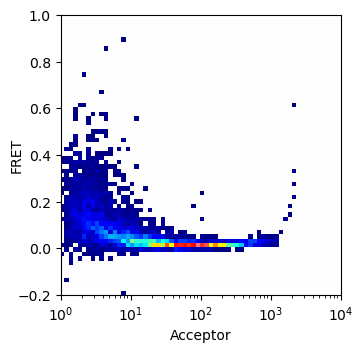

In [23]:
fig.set_dpi(100)
fig